# A/B Testing Method

A/B testing is a method where two versions (A and B) are compared. This test helps find out which version works better. For example, two different designs of a webpage are tested to see which one gets more conversions.

# Comparison of Conversion Rates Between A/B Testing and Bidding Methods

# Business Problem

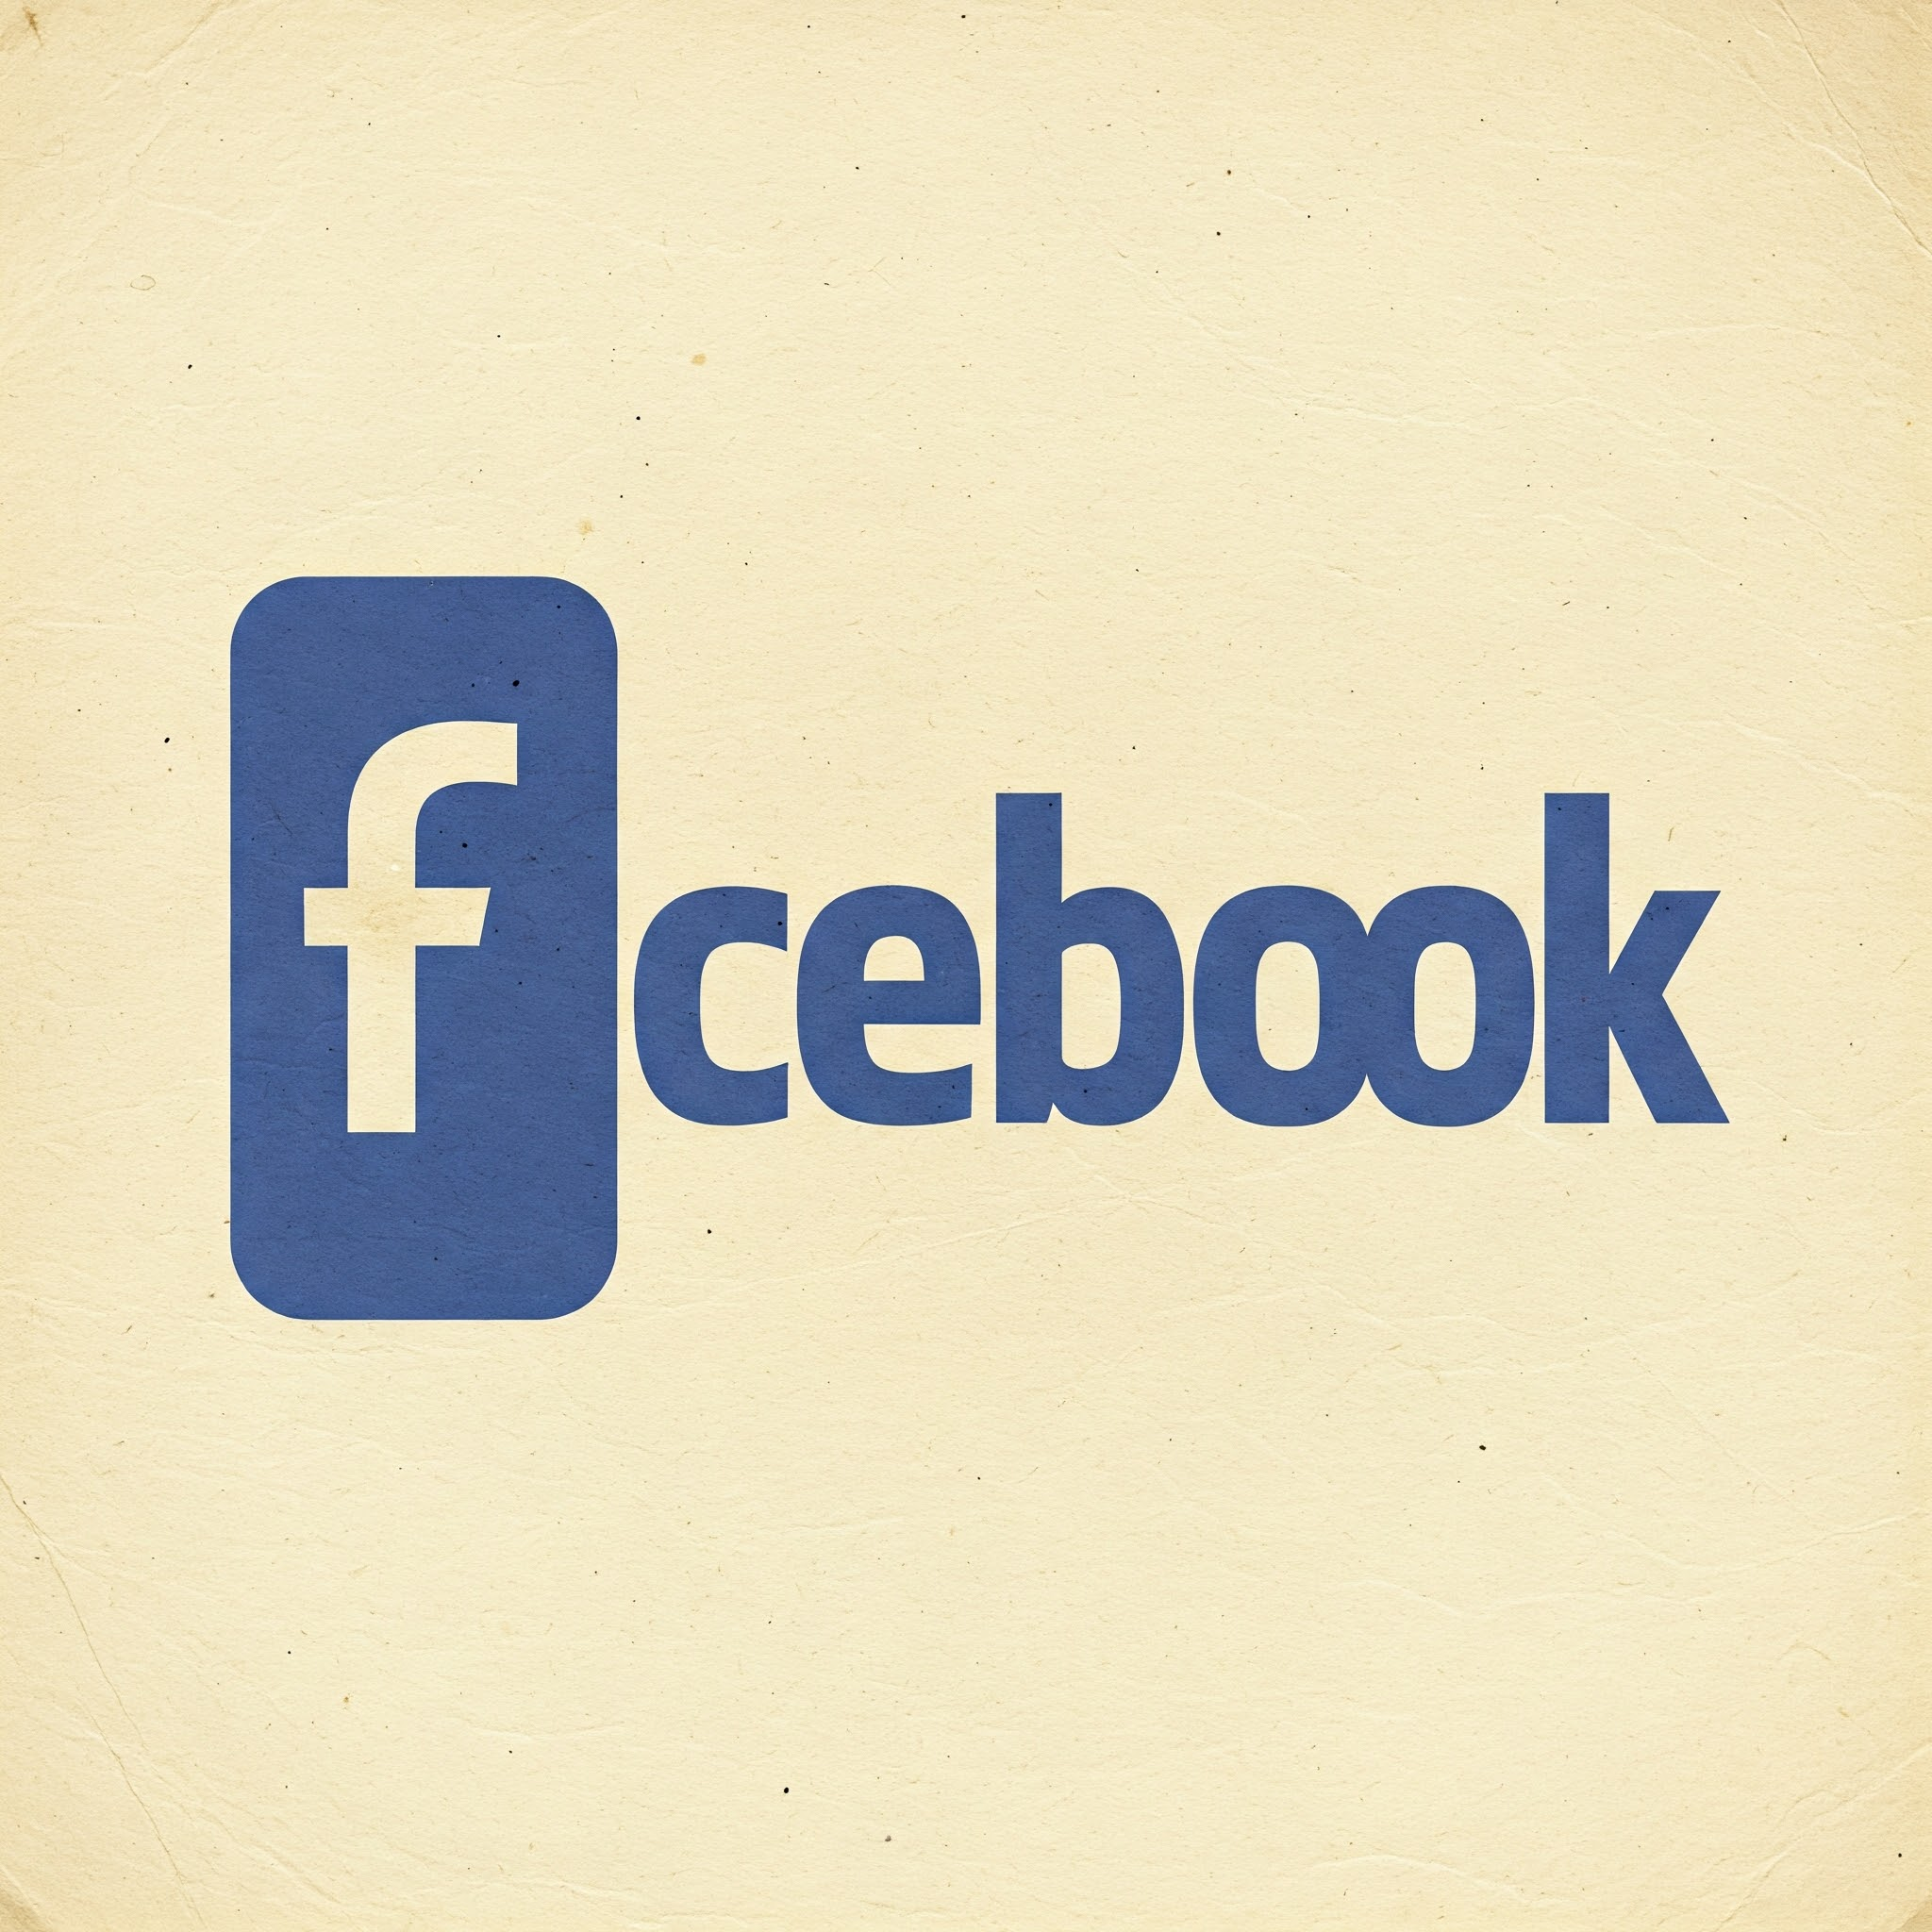

Facebook recently introduced a new bidding type called "averagebidding" as an alternative to the existing "maximumbidding" bidding type. One of our customers, bombabomba.com, decided to test this new feature and wants to run an A/B test to find out if averagebidding brings more conversions than maximumbidding.

The A/B test has been running for one month, and bombabomba.com is now asking you to analyze the results of this A/B test. The final success measure for bombabomba.com is "Purchase." Therefore, the focus of the statistical tests should be on the Purchase metric.

# **Dataset Story**

This dataset contains information about a company's website, including the number of ads seen and clicked by users, as well as the revenue generated from these actions. There are two separate datasets: Control and Test groups. These datasets are in separate sheets of the ab_testing.xlsx Excel file. The Control group has been given Maximum Bidding, and the Test group has been given Average Bidding.

Variables:

Impression: Number of ad views

Click: Number of clicks on the viewed ad

Purchase: Number of products purchased after clicking on the ad

Earning: Earnings from the purchased products

# **Task 1: Preparing and Analyzing the Data**

**Step 1: Load the dataset named ab_testing_data.xlsx, which consists of control and test group data. Assign the control and test group data to separate variables.**

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
control_grup_df = pd.read_excel ("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name='Control Group')
test_grup_df = pd.read_excel ("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name='Test Group')

**Step 2: Analyze the control and test group data.**

In [4]:
def check_df(dataframe, head=5):
    print("---------------------------- SHAPE ---------------------------")
    print(dataframe.shape)

    print("---------------------------- TYPES ---------------------------")
    print(dataframe.dtypes)

    print("---------------------------- HEAD ----------------------------")
    print(dataframe.head(head))

    print("---------------------------- TAIL ----------------------------")
    print(dataframe.tail(head))

    print("---------------------------- NA ------------------------------")
    print(dataframe.isnull().sum())

    print("---------------------------- QUANTILES -----------------------")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(control_grup_df)
check_df(test_grup_df)

---------------------------- SHAPE ---------------------------
(40, 4)
---------------------------- TYPES ---------------------------
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
---------------------------- HEAD ----------------------------
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
---------------------------- TAIL ----------------------------
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
---------------------------- NA ------------------------------
Impre

**Step 3: After the analysis, use the concat method to merge the control and test group data.**

In [5]:
concat_df = pd.concat([control_grup_df, test_grup_df], ignore_index=True)
concat_df.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


Text(0, 0.5, 'Frekans')

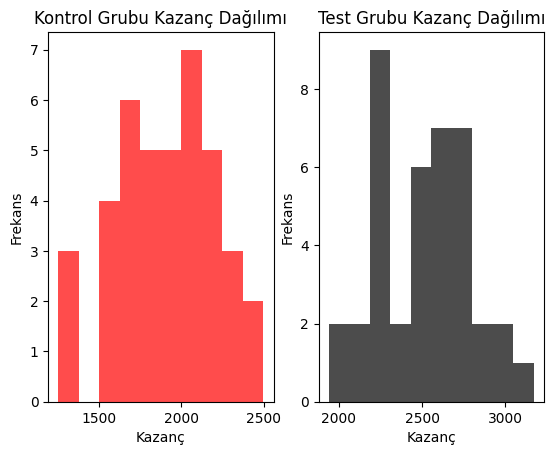

In [6]:
####EARNING
# Kontrol grubu için histogram
plt.subplot(1, 2, 1)
plt.hist(control_grup_df['Earning'], bins=10, color='red', alpha=0.7)
plt.title('Kontrol Grubu Kazanç Dağılımı')
plt.xlabel('Kazanç')
plt.ylabel('Frekans')

# Test grubu için histogram
plt.subplot(1, 2, 2)
plt.hist(test_grup_df['Earning'], bins=10, color='black', alpha=0.7)
plt.title('Test Grubu Kazanç Dağılımı')
plt.xlabel('Kazanç')
plt.ylabel('Frekans')

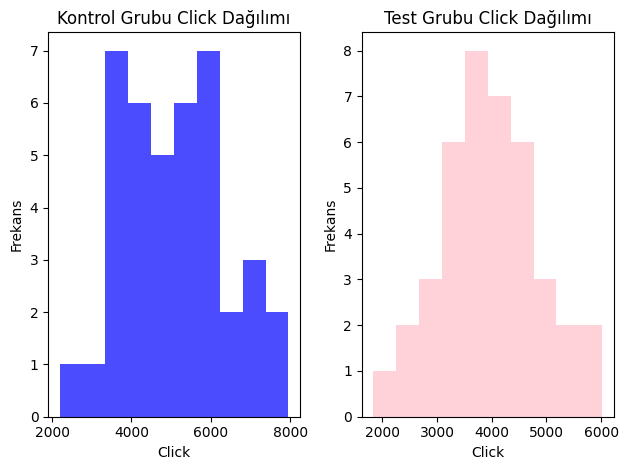

In [7]:
####CLICK
# Kontrol grubu için histogram
plt.subplot(1, 2, 1)
plt.hist(control_grup_df['Click'], bins=10, color='blue', alpha=0.7)
plt.title('Kontrol Grubu Click Dağılımı')
plt.xlabel('Click')
plt.ylabel('Frekans')

# Test grubu için histogram
plt.subplot(1, 2, 2)
plt.hist(test_grup_df['Click'], bins=10, color='pink', alpha=0.7)
plt.title('Test Grubu Click Dağılımı')
plt.xlabel('Click')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

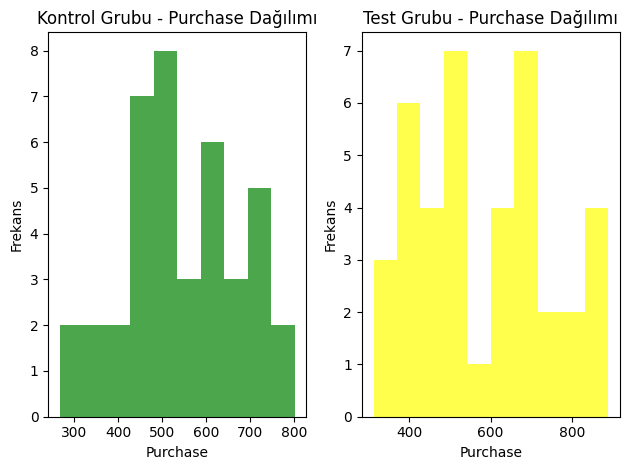

In [8]:
###Purchase
# Kontrol grubu için Purchase histogramı
plt.subplot(1, 2, 1)
plt.hist(control_grup_df['Purchase'], bins=10, color='green', alpha=0.7)
plt.title('Kontrol Grubu - Purchase Dağılımı')
plt.xlabel('Purchase')
plt.ylabel('Frekans')

# Test grubu için Purchase histogramı
plt.subplot(1, 2, 2)
plt.hist(test_grup_df['Purchase'], bins=10, color='yellow', alpha=0.7)
plt.title('Test Grubu - Purchase Dağılımı')
plt.xlabel('Purchase')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

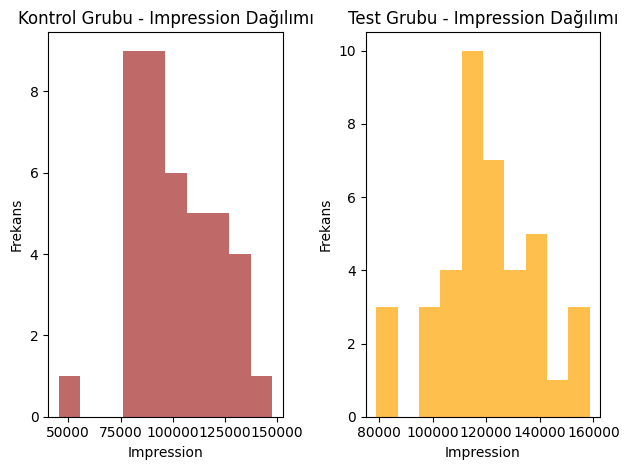

In [9]:
###İMPRESSION
# Kontrol grubu için Impression histogramı
plt.subplot(1, 2, 1)
plt.hist(control_grup_df['Impression'], bins=10, color='brown', alpha=0.7)
plt.title('Kontrol Grubu - Impression Dağılımı')
plt.xlabel('Impression')
plt.ylabel('Frekans')

# Test grubu için Impression histogramı
plt.subplot(1, 2, 2)
plt.hist(test_grup_df['Impression'], bins=10, color='orange', alpha=0.7)
plt.title('Test Grubu - Impression Dağılımı')
plt.xlabel('Impression')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

# Task 2: Defining the Hypothesis of the A/B Test

**Step 1: Define the hypothesis.**

H0: M1 = M2

H1: M1 != M2

**Step 2: Analyze the purchase (earnings) averages for the control and test groups.**

In [10]:
control_mean = control_grup_df['Purchase'].mean()
test_mean = test_grup_df['Purchase'].mean()
print('control_grup_df_mean:', control_mean, 'test_grup_df_mean:', test_mean)  

control_grup_df_mean: 550.8940587702316 test_grup_df_mean: 582.1060966484675


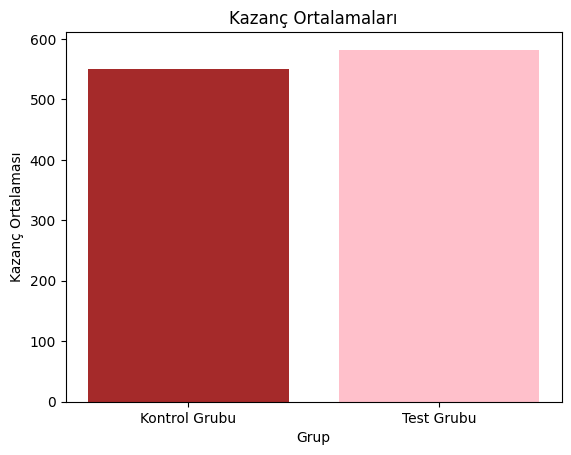

In [11]:
group_names = ['Kontrol Grubu', 'Test Grubu']
mean_values = [control_mean, test_mean]

plt.bar(group_names, mean_values, color=['brown', 'pink'])

# Başlık ve etiketler
plt.title('Kazanç Ortalamaları', fontsize=12)
plt.xlabel('Grup', fontsize=10)
plt.ylabel('Kazanç Ortalaması', fontsize=10)

# Grafiği göster
plt.show()

# Task 3: Performing the Hypothesis Test

**Step 1: Before performing the hypothesis test, check the assumptions. These are the Normality Assumption and the Homogeneity of Variances.**

Normality Assumption:
H0: The normal distribution assumption holds.
H1: The normal distribution assumption does not hold.
If p < 0.05, reject H0. If p > 0.05, fail to reject H0.
Test whether the control and test groups meet the normality assumption for the "Purchase" variable.
Based on the test result, does the normality assumption hold for both control and test groups? Comment on the obtained p-values.

Homogeneity of Variances:
H0: The variances are homogeneous.
H1: The variances are not homogeneous.
If p < 0.05, reject H0. If p > 0.05, fail to reject H0.
Test whether the homogeneity of variances holds for the control and test groups for the "Purchase" variable.
Based on the test result, does the homogeneity of variances hold? Comment on the obtained p-values.

In [12]:
from scipy.stats import shapiro
stat_control, p_control = shapiro(control_grup_df['Purchase'])
stat_test, p_test = shapiro(test_grup_df['Purchase'])

print(f"Kontrol Grubu: Test Stat = {stat_control:.4f}, p-value = {p_control:.4f}")
print(f"Test Grubu: Test Stat = {stat_test:.4f}, p-value = {p_test:.4f}")


if p_control < 0.05:
    print("Kontrol grubu için normallik varsayımı sağlanmıyor!")
else:
    print("Kontrol grubu için normallik varsayımı sağlanıyor!")


if p_test < 0.05:
    print("Test grubu için normallik varsayımı sağlanmıyor!")
else:
    print("Test grubu için normallik varsayımı sağlanıyor!")

Kontrol Grubu: Test Stat = 0.9773, p-value = 0.5891
Test Grubu: Test Stat = 0.9589, p-value = 0.1541
Kontrol grubu için normallik varsayımı sağlanıyor!
Test grubu için normallik varsayımı sağlanıyor!


Since the normality assumption holds for both the control and test groups, the next step will be the variance homogeneity test.

Variance homogeneity check with Levene's Test

In [13]:
from scipy.stats import levene

stat, p = levene(control_grup_df['Purchase'], test_grup_df['Purchase'])
print(f"Levene Test Stat = {stat:.4f}, p-value = {p:.4f}")

# p-value < 0.05 ise varyanslar homojen değildir
if p < 0.05:
    print("Varyans homojenliği sağlanmıyor! (Farklı varyans varsayımı ile test yapılmalı)")
else:
    print("Varyans homojenliği sağlanıyor! (Eşit varyans varsayımı ile test yapılabilir)")

Levene Test Stat = 2.6393, p-value = 0.1083
Varyans homojenliği sağlanıyor! (Eşit varyans varsayımı ile test yapılabilir)


RESULT: p-value = 0.1083 / Variance homogeneity holds! (A test can be performed with the assumption of equal variances)

p-value ≥ 0.05 → The variances are homogeneous (Independent Two-Sample t-Test can be applied)

In [14]:
from scipy.stats import ttest_ind

# Bağımsız iki örneklem t-testi (eşit varyans varsayımı ile)
stat, p = ttest_ind(control_grup_df['Purchase'], test_grup_df['Purchase'], equal_var=True)

print(f"T-Test Stat = {stat:.4f}, p-value = {p:.4f}")

# p-value < 0.05 ise fark istatistiksel olarak anlamlıdır
if p < 0.05:
    print("Sonuç: İki grup arasında istatistiksel olarak anlamlı bir fark vardır!")
else:
    print("Sonuç: İki grup arasında istatistiksel olarak anlamlı bir fark yoktur!")

T-Test Stat = -0.9416, p-value = 0.3493
Sonuç: İki grup arasında istatistiksel olarak anlamlı bir fark yoktur!


# Task 4: Analysis of Results

Although the average purchase of the test group (582.11) is higher than that of the control group (550.89), this difference is not statistically significant.

This means that the change applied to the test group (e.g., a promotion, advertisement, pricing strategy, etc.) may not have caused a significant change in purchasing behavior.

In this case, we cannot reject the hypothesis and can conclude that the tested strategy did not have a significant effect.